<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/agrismartsystem/blob/main/AnaliseSerieTemporal/AnaliseSeriestemporaispHCompleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import time
import matplotlib as mpl
import os
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from scipy.stats import ttest_rel
from statsmodels.tsa.stattools import adfuller
import statsmodels.stats.api as sms


In [ ]:
if __name__ == "__main__":

    json_file = open("bancotestelstmparaanalisedeserietemporal.json")
    dic = json.load(json_file)

    arr = []

    for item in dic:
        arr.append(dic[item])

In [ ]:
for item in arr:

        item['Humidity'] = item['Humidity'].split(":")[1].split("}")[0]
        item['Temperature'] = item['Temperature'].split(":")[1].split("}")[0]
        item['Time'] = item['Time'].split(":")[1].split("}")[0].replace('"', '')
        item['pH'] = item['pH'].split(":")[1].split("}")[0]
        item['pHpred'] = item['pHpred'].split(":")[1].split("}")[0]

print(arr)

[{'Humidity': '22.0', 'Temperature': '27.5', 'Time': '2023-03-07 22', 'pH': '7.06', 'pHpred': '6.8591123'}, {'Humidity': '10.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '7.111'}, {'Humidity': '176.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '6.963046'}, {'Humidity': '9.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.12', 'pHpred': '6.9948'}, {'Humidity': '72.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.1', 'pHpred': '6.7748847'}, {'Humidity': '176.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '7.160022'}, {'Humidity': '16.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '7.031192'}, {'Humidity': '176.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.12', 'pHpred': '6.986867'}, {'Humidity': '168.0', 'Temperature': '27.56', 'Time': '2023-03-07 22', 'pH': '7.11', 'pHpred': '6.851901'}, {'Humidity': '25.0', 'Temperature': '2

In [ ]:

dfra = pd.DataFrame(columns=['Humidity', 'Temperature', 'Time', 'pH', 'pHpred'])
dfra = dfra.append(arr, ignore_index=True)
dfra.to_csv('bancotestelstmparaanalisedeserietemporal.csv', index=False)
print(dfra)


     Humidity Temperature           Time      pH     pHpred
0        22.0        27.5  2023-03-07 22    7.06  6.8591123
1        10.0       27.56  2023-03-07 22    7.11      7.111
2       176.0       27.56  2023-03-07 22    7.11   6.963046
3         9.0       27.56  2023-03-07 22    7.12     6.9948
4        72.0       27.56  2023-03-07 22     7.1  6.7748847
...       ...         ...            ...     ...        ...
2771    176.0        26.0  2023-03-21 15  8.9453     8.8855
2772    176.0        26.0  2023-03-21 15  8.9452     8.9886
2773    176.0        26.0  2023-03-21 15  8.9844    8.94426
2774    176.0        26.0  2023-03-21 15  8.9866    8.89944
2775    176.0        26.0  2023-03-21 15  8.9945    8.87455

[2776 rows x 5 columns]


<ipython-input-4-34af79e6359a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfra = dfra.append(arr, ignore_index=True)


In [ ]:
dfra['Humidity'] = dfra['Humidity'].astype(float)
dfra['pH'] = dfra['pH'].astype(float)
dfra['Temperature'] = dfra['Temperature'].astype(float)
dfra['pHpred'] = dfra['pHpred'].astype(float)
dfra['Time'] = pd.to_datetime(dfra['Time'], format='%Y-%m-%d %H:%M:%S')



humi = dfra['Humidity']
temp = dfra['Temperature']
pH = dfra['pH']
pHpred = dfra['pHpred']
time = dfra['Time']

In [ ]:
## features

features_3 = ['pH', 'pHpred']

features = dfra[features_3]
features.index = dfra['Time']
features.head()


,pH,pHpred
Time,,
2023-03-07 22:00:00,7.06,6.859112
2023-03-07 22:00:00,7.11,7.111000
2023-03-07 22:00:00,7.11,6.963046
2023-03-07 22:00:00,7.12,6.994800
2023-03-07 22:00:00,7.10,6.774885


In [ ]:
mpl.rcParams['figure.figsize'] = (16,8)
mpl.rcParams['axes.grid'] = False

array([<Axes: xlabel='Time'>, <Axes: xlabel='Time'>], dtype=object)

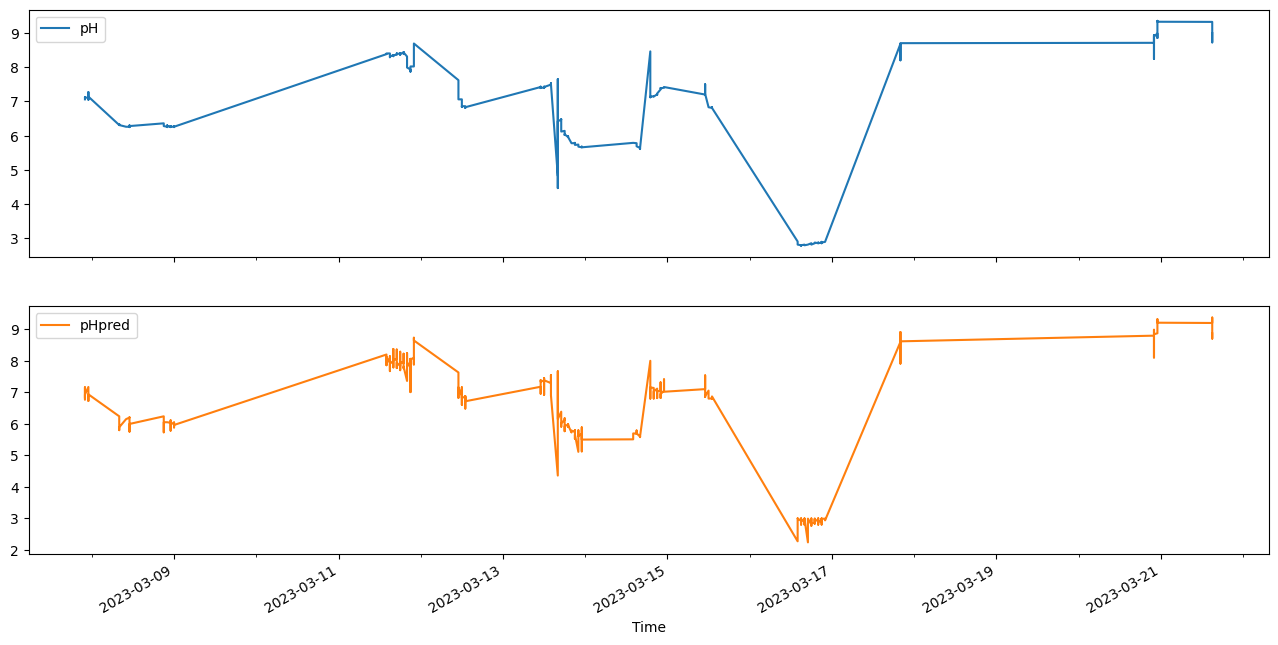

In [ ]:

features.plot(subplots=True)

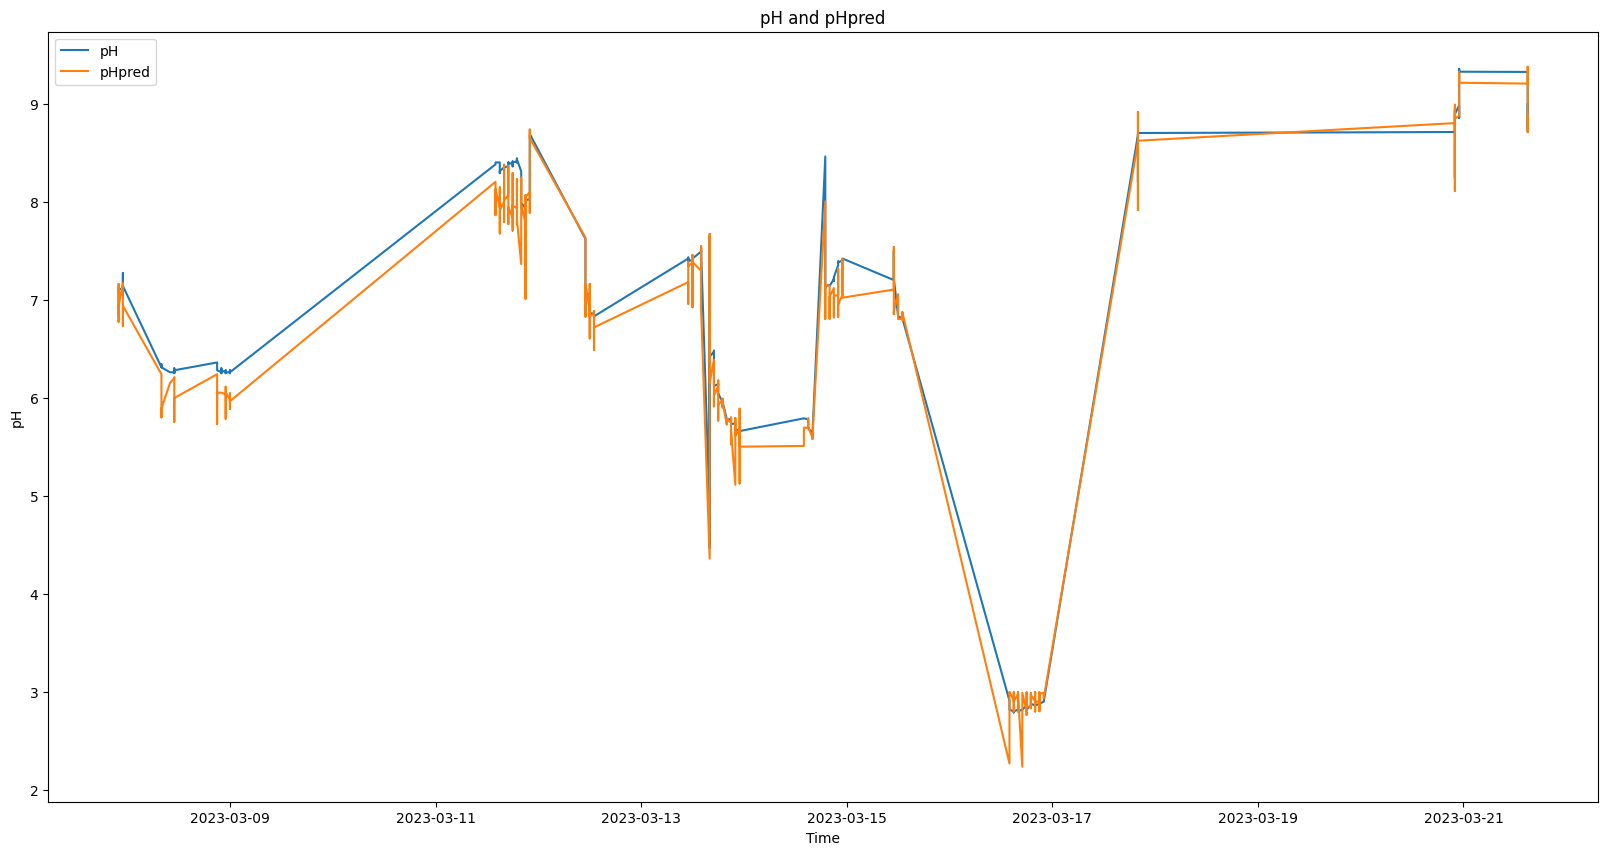

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time, pH, label='pH')
ax.plot(time, pHpred, label='pHpred')
ax.set_xlabel('Time')
ax.set_ylabel('pH')
ax.set_title('pH and pHpred')
ax.legend()
plt.show()

In [ ]:
# metricas de erro previsão da serie temporal
print('mean_absolute_error', mean_absolute_error(pH, pHpred))
print('mean_squared_log_error', mean_squared_log_error(pH, pHpred))
print('mean_squared_error', mean_squared_error(pH, pHpred))
print('r2_score', r2_score(pH, pHpred))
print(' mean_absolute_percentage_error', mean_absolute_percentage_error(pH, pHpred))

mean_absolute_error 0.179678682863794
mean_squared_log_error 0.0009801922547682236
mean_squared_error 0.05719997898204034
r2_score 0.9814352639933589
 mean_absolute_percentage_error 0.027857679208889853


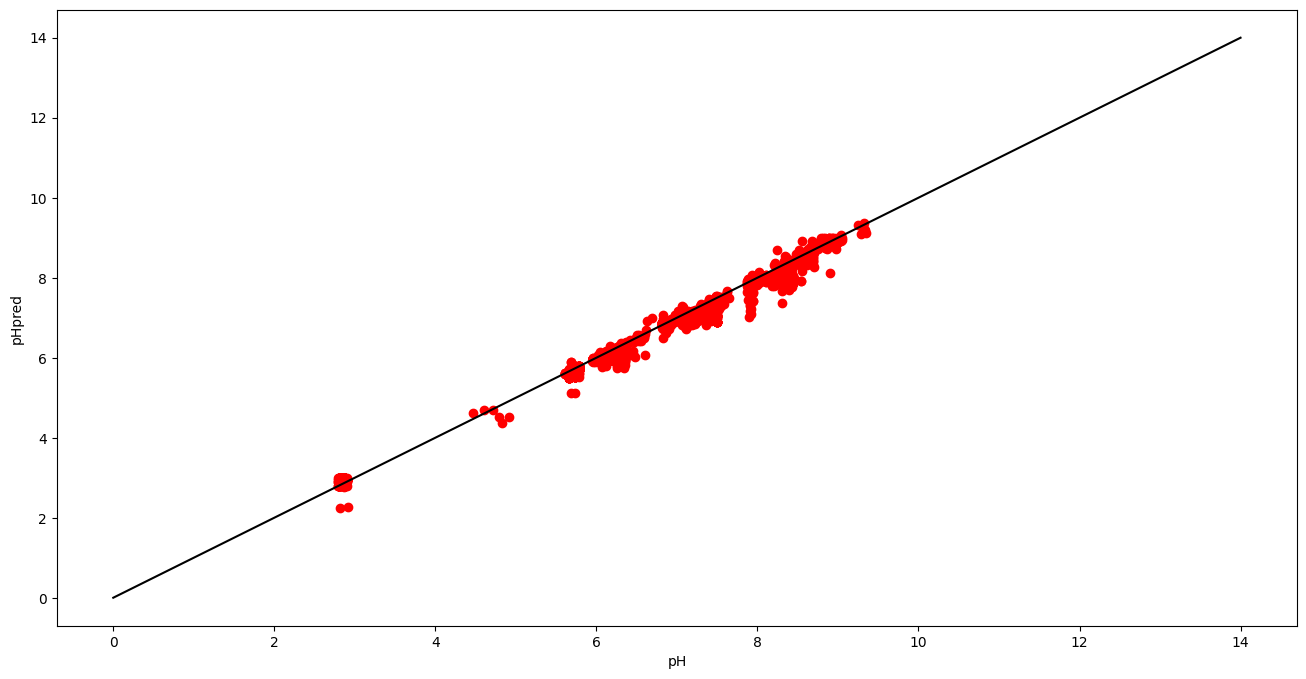

In [ ]:
#grafico de perda erro
plt.plot(pH, pHpred, 'ro')
plt.plot([0, 14], [0, 14], 'k-')
plt.xlabel('pH')
plt.ylabel('pHpred')
plt.show()

### Calculos de Métricas de Erro

In [ ]:
# Calcular MSE (Mean Squared Error)
mse = mean_squared_error(dfra['pH'], dfra['pHpred'])

# Calcular RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular MAE (Mean Absolute Error)
mae = mean_absolute_error(dfra['pH'], dfra['pHpred'])

# Calcular MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((dfra['pH'] - dfra['pHpred']) / dfra['pH']) * 100)

# Imprimir os resultados
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 0.05719997898204034
Root Mean Squared Error (RMSE): 0.23916517092177186
Mean Absolute Error (MAE): 0.179678682863794
Mean Absolute Percentage Error (MAPE): 2.785767920888985


### Teste de Estacionaridade

In [ ]:
# Converter a coluna Time para o tipo datetime, caso ainda não esteja
dfra['Time'] = pd.to_datetime(dfra['Time'], format='%Y-%m-%d %H:%M:%S')

# Ordenar o DataFrame pelo tempo (caso necessário)
dfra.sort_values(by='Time', inplace=True)

# Criar a série temporal a partir da coluna 'pH'
pH_series = dfra['pH']


In [ ]:
# Função para realizar o teste ADF e imprimir os resultados
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print("Resultado do Teste ADF:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Valores críticos:")
    for key, value in result[4].items():
        print("\t{}: {}".format(key, value))

    if result[1] < 0.05:
        print("A série é estacionária (rejeitamos a hipótese nula).")
    else:
        print("A série não é estacionária (falhamos em rejeitar a hipótese nula).")


In [ ]:
# Realizar o teste ADF na série temporal
adf_test(pH_series)

Resultado do Teste ADF:
ADF Statistic: -1.9819079989844492
p-value: 0.29456171379742746
Valores críticos:
	1%: -3.4327146584803945
	5%: -2.862584738023912
	10%: -2.5673261469697035
A série não é estacionária (falhamos em rejeitar a hipótese nula).


###  Intervalos de Confiança
#### Cálculo de intervalos de confiança para as previsões, o que ajuda a entender a incerteza associada às estimativas.

In [ ]:
# Converter as colunas relevantes para o tipo float (caso ainda não estejam)
dfra['Humidity'] = dfra['Humidity'].astype(float)
dfra['pH'] = dfra['pH'].astype(float)
dfra['Temperature'] = dfra['Temperature'].astype(float)
dfra['pHpred'] = dfra['pHpred'].astype(float)

# Converter a coluna Time para o tipo datetime, caso ainda não esteja
dfra['Time'] = pd.to_datetime(dfra['Time'], format='%Y-%m-%d %H:%M:%S')

# Suponha que as previsões do modelo estejam armazenadas na coluna 'pHpred'
predictions = dfra['pHpred']

In [ ]:
# Nível de confiança desejado (por exemplo, 95%)
confidence_level = 0.95

# Calcular os intervalos de confiança
lower_bound, upper_bound = sms.DescrStatsW(predictions).tconfint_mean(alpha=1-confidence_level)

# Imprimir os resultados
print("Intervalo de Confiança ({}%):".format(confidence_level * 100))
print("Limite Inferior:", lower_bound)
print("Limite Superior:", upper_bound)

Intervalo de Confiança (95.0%):
Limite Inferior: 6.282109514302388
Limite Superior: 6.406730005294842


### Índice de Theil (Theil's U)

In [ ]:
# Calcular o Índice de Theil (Theil's U)
def theil_u(y_true, y_pred):
    # Verificar se as duas séries têm o mesmo comprimento
    assert len(y_true) == len(y_pred), "As séries têm tamanhos diferentes."

    # Calcular o numerador e o denominador do Índice de Theil
    numerator = np.sqrt(np.mean((y_true - y_pred) ** 2))
    denominator = np.sqrt(np.mean(y_true ** 2)) + np.sqrt(np.mean(y_pred ** 2))

    # Calcular o Índice de Theil (Theil's U)
    theil_u_index = numerator / denominator

    return theil_u_index

In [ ]:

theil_u_index = theil_u(dfra['pH'], dfra['pHpred'])


In [ ]:
# Imprimir o resultado
print("Índice de Theil (Theil's U):", theil_u_index)

Índice de Theil (Theil's U): 0.018004996699345938


###  Gráfico de Dispersão de Previsões versus Valores Reais:
Plotar as previsões versus os valores reais em um gráfico de dispersão pode ajudar a identificar se as previsões estão superestimando ou subestimando os valores reais.



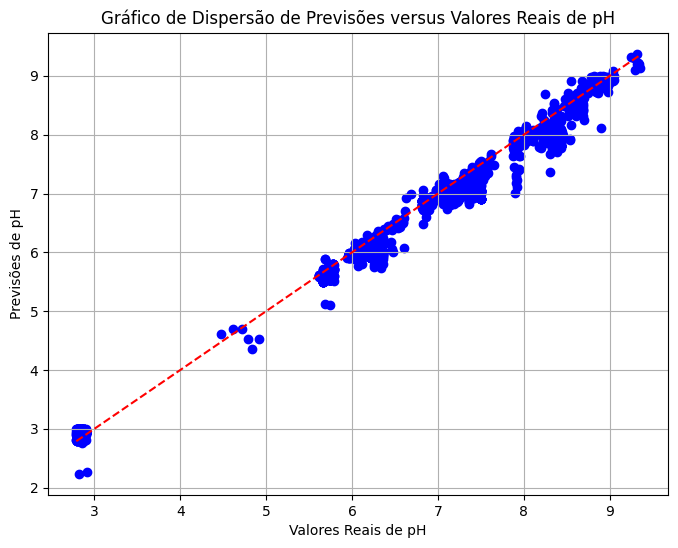

In [ ]:
# Converter as colunas para o tipo float, caso ainda não estejam
dfra['Humidity'] = dfra['Humidity'].astype(float)
dfra['pH'] = dfra['pH'].astype(float)
dfra['Temperature'] = dfra['Temperature'].astype(float)
dfra['pHpred'] = dfra['pHpred'].astype(float)

# Definir as variáveis alvo
pH = dfra['pH']
pHpred = dfra['pHpred']

# Plotar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(pH, pHpred, color='blue', marker='o')
plt.plot([min(pH), max(pH)], [min(pH), max(pH)], color='red', linestyle='--')
plt.xlabel('Valores Reais de pH')
plt.ylabel('Previsões de pH')
plt.title('Gráfico de Dispersão de Previsões versus Valores Reais de pH')
plt.grid(True)
plt.show()

### Gráfico dos Resíduos

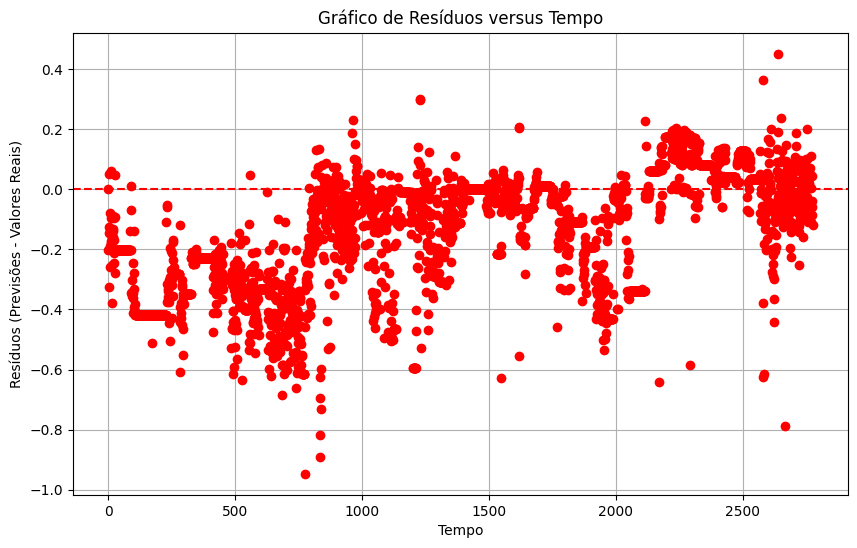

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame dfra com as séries temporais e as colunas 'pH' e 'pHpred'
# Vamos usar as colunas 'pH' e 'pHpred' como exemplo
# dfra = ...

# Converter as colunas para o tipo float, caso ainda não estejam
dfra['Humidity'] = dfra['Humidity'].astype(float)
dfra['pH'] = dfra['pH'].astype(float)
dfra['Temperature'] = dfra['Temperature'].astype(float)
dfra['pHpred'] = dfra['pHpred'].astype(float)

# Definir as variáveis alvo
pH = dfra['pH']
pHpred = dfra['pHpred']

# Calcular os resíduos (diferenças entre previsões e valores reais)
residuos = pHpred - pH

# Plotar o gráfico de resíduos versus tempo
plt.figure(figsize=(10, 6))
plt.plot(dfra.index, residuos, color='red', marker='o', linestyle='None')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Tempo')
plt.ylabel('Resíduos (Previsões - Valores Reais)')
plt.title('Gráfico de Resíduos versus Tempo')
plt.grid(True)
plt.show()
